<h1 style="text-align: center; color: navy;"> TumorInsight </h1> <h3 style="text-align:center; color: orange"> &gt;&gt; &nbsp; DATASET PREPERATION </h3>

<hr>
<p style="color: darkcyan; font-weight:bold;">
    SHAURYA CHOUDHARY - 18BCE2113 <br>
    PRANAV KHURANA - 18BCE2513 <br>
</p>
<hr>

In [1]:
import os
import PIL
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
import cv2
%matplotlib inline

In [2]:
arrays = {}
img = None

cjdata
('cjdata', <HDF5 group "/cjdata" (5 members)>)
PID <HDF5 dataset "PID": shape (6, 1), type "<u2">
image <HDF5 dataset "image": shape (512, 512), type "<i2">
label <HDF5 dataset "label": shape (1, 1), type "<f8">
tumorBorder <HDF5 dataset "tumorBorder": shape (1, 38), type "<f8">
tumorMask <HDF5 dataset "tumorMask": shape (512, 512), type "|u1">
Image shape:  (512, 512)
Label 1.0
Coords:  [267.61524501 231.37568058 277.83666062 248.10163339 289.91651543
 250.8892922  305.71324864 253.676951   318.72232305 249.9600726
 321.50998185 237.88021779 354.96188748 234.16333938 367.97096189
 227.65880218 380.9800363  210.93284936 372.61705989 195.13611615
 363.32486388 177.48094374 350.31578947 176.55172414 336.37749546
 183.98548094 317.79310345 196.06533575 305.71324864 207.21597096
 295.49183303 217.43738657 288.98729583 222.08348457 273.19056261
 223.94192377 268.54446461 228.58802178]
Mask shape:  (512, 512)


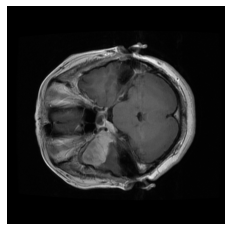

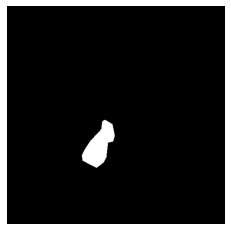

In [3]:
with h5py.File('dataset/imageData/1.mat', 'r') as f:
    for key in f.keys():
      print(key)
    for item in f.items():
      print(item)
    for key, val in f['cjdata'].items():
      print(key, val)
    img = f['cjdata']['image']
    label = f['cjdata']['label'][0][0]
    tumorBorder = f['cjdata']['tumorBorder'][0]
    mask = f['cjdata']['tumorMask']
    fig = plt.figure(2)
    img = np.array(img, dtype=np.float32)
    img = img/127.5 - 1
    mask = np.array(mask, dtype=np.float32)
    mask = mask/127.5 - 1
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    print("Image shape: ", img.shape)
    print("Label", label)
    print("Coords: ", tumorBorder)
    print("Mask shape: ", mask.shape)
    fig = plt.figure(3)
    plt.axis('off')
    plt.imshow(mask, cmap='gray')

A single .mat file consists of:

* **PID:** Patient ID for that particular tumor image. This is not a necessary feature.
* **image:** Image of the brain tumor
* **label:** Label between 1-3 denoting what kind of tumor is present
* **tumorBorder:** Coordinates of the tumor present in the image
* **tumorMask:** Masked version of the tumor.

We'll need the image, label, tumorBorder, tumorMask which are the necessary features that'll help us to detect brain tumors.

Create new folders named the following:

* **new_dataset:** We'll be using this folder to store our images, labels, mask and borders
* **bt_images:** We'll store the full brain tumor image in this folder
* **bt_mask:** We'll store the mask images of the brain tumor in this folder

In [4]:
os.mkdir('new_dataset')
os.mkdir('new_dataset/bt_images') 

Create empty lists for storing labels

In [5]:
labels = []
border = []

Save images of brain tumor, masks and store labels and borders in their respective lists iteratively.

3064 files successfully saved


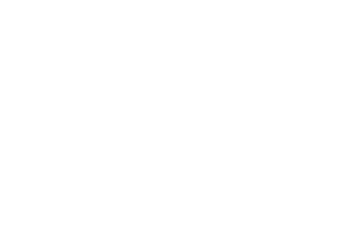

In [6]:
filename = None

for filename in range(1, 3065):
    with h5py.File('dataset/imageData/{}.mat'.format(filename), 'r') as f:
        img = f['cjdata']['image']
        label = f['cjdata']['label'][0][0]
        labels.append(int(label))
        
        coord = f['cjdata']['tumorBorder']
        border.append(coord)
        img = np.array(img, dtype=np.float32)
      
        plt.axis('off')
        plt.imsave("new_dataset/bt_images/{}.jpg".format(filename), img, cmap='gray')
      
      
print("{} files successfully saved".format(filename))

Convert the Python lists to a Numpy arrays

In [7]:
label_names = np.array(labels, dtype=np.int64)

Check if the array has the right shape & length.

In [8]:
label_names.shape

(3064,)

In [9]:
for i in range(2500,  2505):
    print(label_names[i])

2
2
2
2
2


Store the labels and tumor border (coordinates) as a pickle file, which can be loaded whenever we want to use it.

In [10]:
pickle_out = open("new_dataset/labels.pickle","wb")                    
pickle.dump(label_names, pickle_out)
pickle_out.close()

Create an empty list named 'training_data' in which we'll store our images and their respective labels as arrays

In [11]:
training_data = []
img = None
label = None
i = None
y = label_names

Read the images from bt_images folder from Google Drive and convert it to RGB images and store it along with their respective labels in the training_data list.

In [12]:
for i in range(1, 3065):
  img = cv2.imread("new_dataset/bt_images/{}.jpg".format(i), cv2.IMREAD_GRAYSCALE)
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  img = cv2.resize(img, (512, 512))
  label = y[i-1]
  training_data.append([img, label])

print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))

pickle_out = open("new_dataset/training_data.pickle","wb")                    
pickle.dump(training_data, pickle_out)
pickle_out.close()

shape: (512, 512, 3) label: 1 | 3064 samples successfully preprocessed


<hr>